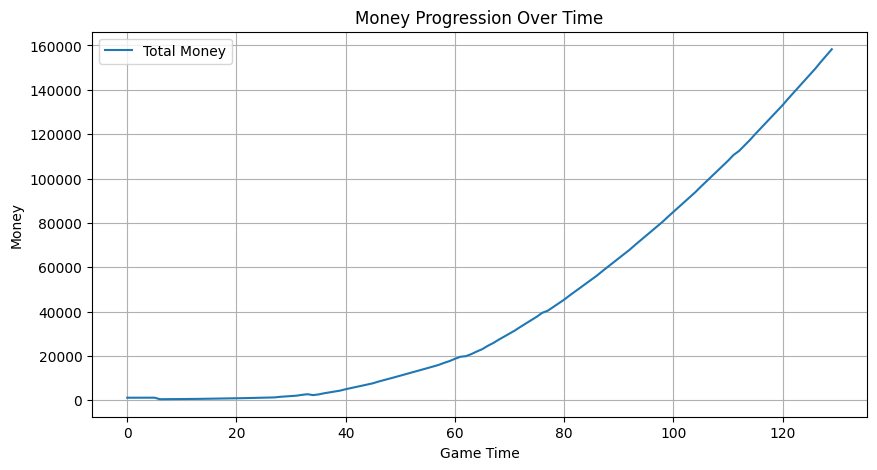

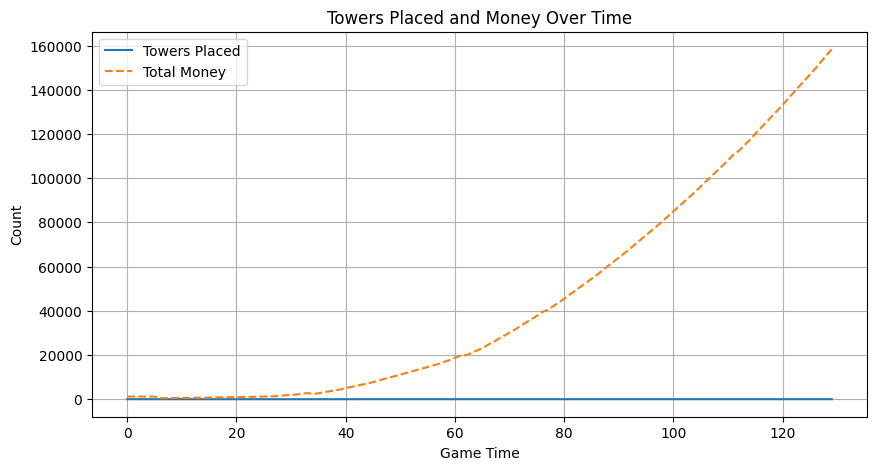

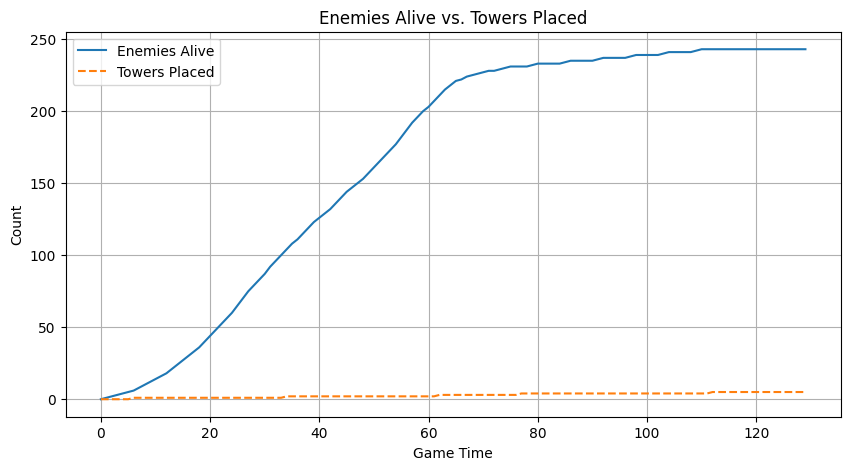

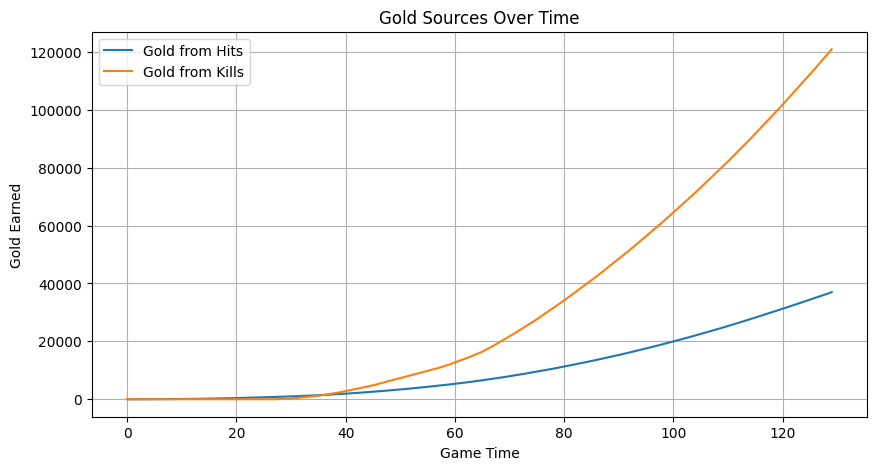

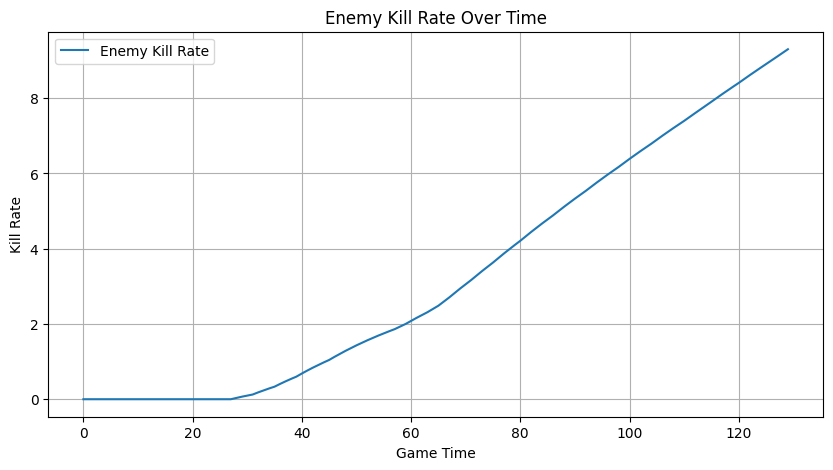

Average time to place a tower: 22.40 time units


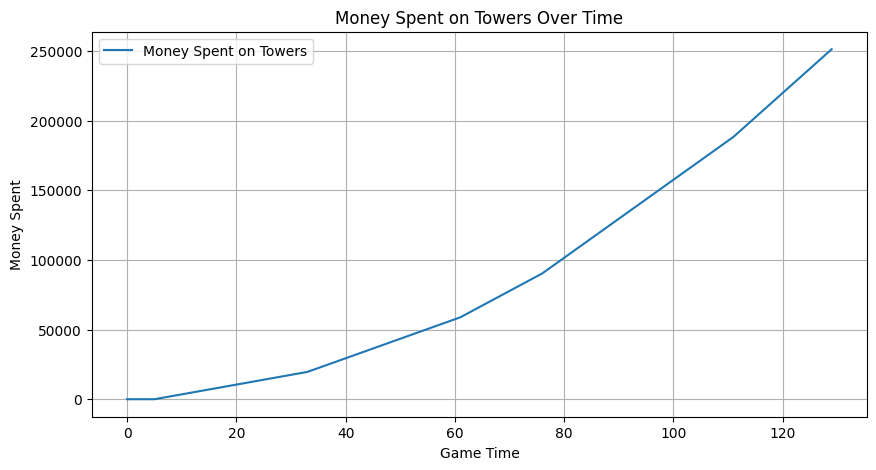

Recent Kill Rate: 6.816428478344974
Earlier Kill Rate: 1.8233881103966787
Potential Saturation: Kill rate has significantly increased.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
runtime_data = pd.read_csv("runtime_data.csv")
static_data = pd.read_csv("static_game_data.csv")

# Extract static data
tower_cost = static_data["towerCost"].iloc[0]
enemy_spawn_rate = static_data["enemySpawnRate"].iloc[0]
enemy_max_health = static_data["enemyMaxHealth"].iloc[0]
projectile_damage = static_data["projectileDamage"].iloc[0]
hit_gold_gain = static_data["hitGoldGain"].iloc[0]
kill_gold_gain = static_data["killGoldGain"].iloc[0]

# Calculate derived metrics
runtime_data["gold_earned_from_hits"] = runtime_data["projectilesFired"] * hit_gold_gain
runtime_data["gold_earned_from_kills"] = runtime_data["enemiesKilled"] * kill_gold_gain
runtime_data["total_gold_earned"] = runtime_data["gold_earned_from_hits"] + runtime_data["gold_earned_from_kills"]
runtime_data["total_money"] = runtime_data["currentMoney"] + runtime_data["total_gold_earned"].cumsum() # Cumulative gold

runtime_data["enemies_alive"] = runtime_data["enemiesSpawned"].cumsum() - runtime_data["enemiesKilled"].cumsum()
runtime_data["game_time"] = runtime_data.index  # Assuming each row represents a time step


# --- Analysis and Visualization ---

# 1. Gold Progression
plt.figure(figsize=(10, 5))
plt.plot(runtime_data["game_time"], runtime_data["total_money"], label="Total Money")
plt.xlabel("Game Time")
plt.ylabel("Money")
plt.title("Money Progression Over Time")
plt.legend()
plt.grid(True)
plt.show()

# 2. Tower Placement vs. Money
plt.figure(figsize=(10, 5))
plt.plot(runtime_data["game_time"], runtime_data["towersPlaced"], label="Towers Placed")
plt.plot(runtime_data["game_time"], runtime_data["total_money"], label="Total Money", linestyle="--") # Compare to money
plt.xlabel("Game Time")
plt.ylabel("Count")
plt.title("Towers Placed and Money Over Time")
plt.legend()
plt.grid(True)
plt.show()


# 3. Enemy Population and Tower Count
plt.figure(figsize=(10, 5))
plt.plot(runtime_data["game_time"], runtime_data["enemies_alive"], label="Enemies Alive")
plt.plot(runtime_data["game_time"], runtime_data["towersPlaced"], label="Towers Placed", linestyle="--")
plt.xlabel("Game Time")
plt.ylabel("Count")
plt.title("Enemies Alive vs. Towers Placed")
plt.legend()
plt.grid(True)
plt.show()

# 4. Gold Sources
plt.figure(figsize=(10, 5))
plt.plot(runtime_data["game_time"], runtime_data["gold_earned_from_hits"].cumsum(), label="Gold from Hits")
plt.plot(runtime_data["game_time"], runtime_data["gold_earned_from_kills"].cumsum(), label="Gold from Kills")
plt.xlabel("Game Time")
plt.ylabel("Gold Earned")
plt.title("Gold Sources Over Time")
plt.legend()
plt.grid(True)
plt.show()

# 5.  Enemy Kill Rate (Enemies Killed / Time) - To see if it's saturating
plt.figure(figsize=(10, 5))
kill_rate = runtime_data["enemiesKilled"].cumsum() / (runtime_data["game_time"] + 1) # Adding 1 to avoid division by zero.
plt.plot(runtime_data["game_time"], kill_rate, label="Enemy Kill Rate")
plt.xlabel("Game Time")
plt.ylabel("Kill Rate")
plt.title("Enemy Kill Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()


# 6. Time to place a tower on average.
time_to_place = []
last_placement_time = 0
for i in range(len(runtime_data)):
    if runtime_data['towersPlaced'][i] > runtime_data['towersPlaced'][i-1] if i > 0 else runtime_data['towersPlaced'][i] == 1: # Check if a tower was placed
        time_to_place.append(i - last_placement_time)
        last_placement_time = i

if time_to_place:
    average_placement_time = sum(time_to_place) / len(time_to_place)
    print(f"Average time to place a tower: {average_placement_time:.2f} time units")

else:
    print("No towers were placed.")

# 7.  Money spent on towers
money_spent_on_towers = runtime_data['towersPlaced'] * tower_cost
plt.figure(figsize=(10,5))
plt.plot(runtime_data['game_time'], money_spent_on_towers.cumsum(), label='Money Spent on Towers')
plt.xlabel("Game Time")
plt.ylabel("Money Spent")
plt.title("Money Spent on Towers Over Time")
plt.legend()
plt.grid(True)
plt.show()
